# Telco Customer Churn Prediction Report

## Business Challenge

Customer churn is a critical concern for telecom companies as acquiring new customers is significantly more costly than retaining existing ones. The goal of this analysis is to build a predictive model to **identify customers who are likely to leave** the company, enabling targeted retention efforts

### Projective Objective: Minimize Churn
- The goal of this churn project is to identify customers likely to churn, so that the business can take proactive steps to retain them.

## Dataset Overview

The dataset was sourced from OpenML and includes **19 independent variables** and 1 target variable (`Churn`). These variables fall into three main categories:

- **Demographic Information**: `gender`, `SeniorCitizen`, `Partner`, `Dependents`
- **Customer Account Information**: `tenure`, `Contract`, `PaperlessBilling`, `PaymentMethod`, `MonthlyCharges`, `TotalCharges`
- **Services Information**: `PhoneService`, `MultipleLines`, `InternetService`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`

In [31]:
# Importing Libraries
%matplotlib inline

import os
import sys
scripts_path = os.path.abspath(os.path.join(os.getcwd(), '..', 'scripts'))
sys.path.append(scripts_path) # Add 'scripts' directory to sys.path
import data_processing_framework as dpf
import ml_pipeline_utils as mlpu

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import openml
from autoviz import AutoViz_Class
import importlib

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

In [5]:
# Load and Preview Data from openml
dataset = openml.datasets.get_dataset(42178)
df, *_ = dataset.get_data()

df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Variable Definition

| **Variable**         | **Definition**                                                                                            |
|----------------------|------------------------------------------------------------------------------------------------------------|
| gender               | Whether the client is a female or a male (Female, Male).                                                   |
| SeniorCitizen        | Whether the client is a senior citizen or not (0, 1).                                                      |
| Partner              | Whether the client has a partner or not (Yes, No).                                                         |
| Dependents           | Whether the client has dependents or not (Yes, No).                                                        |
| tenure               | Number of months the customer has stayed with the company (Multiple different numeric values).            |
| Contract             | Indicates the customer’s current contract type (Month-to-Month, One year, Two year).                      |
| PaperlessBilling     | Whether the client has paperless billing or not (Yes, No).                                                 |
| PaymentMethod        | The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit Card (automatic)). |
| MonthlyCharges       | The amount charged to the customer monthly (Multiple different numeric values).                            |
| TotalCharges         | The total amount charged to the customer (Multiple different numeric values).                              |
| PhoneService         | Whether the client has a phone service or not (Yes, No).                                                   |
| MultipleLines        | Whether the client has multiple lines or not (No phone service, No, Yes).                                  |
| InternetServices     | Whether the client is subscribed to Internet service with the company (DSL, Fiber optic, No).             |
| OnlineSecurity       | Whether the client has online security or not (No internet service, No, Yes).                             |
| OnlineBackup         | Whether the client has online backup or not (No internet service, No, Yes).                               |
| DeviceProtection     | Whether the client has device protection or not (No internet service, No, Yes).                           |
| TechSupport          | Whether the client has tech support or not (No internet service, No, Yes).                                |
| StreamingTV          | Whether the client has streaming TV or not (No internet service, No, Yes).                                |
| StreamingMovies      | Whether the client has streaming movies or not (No internet service, No, Yes).                            |
```

## Exploratory Data Analysis (EDA) & Data Cleaning

- Understand patterns, relationships, and distributions in the dataset.
- This step includes:
   - Visualising data.
   - Identifying and addressing outliers & quality issues.
   - Investigating correlations between features (Hypothesis testing).


### Data Visualisation

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   uint8  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   uint8  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


Shape of your Data Set loaded: (7043, 20)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
  Printing up to 30 columns (max) in each category:
    Numeric Columns : ['MonthlyCharges']
    Integer-Categorical Columns: ['tenure']
    String-Categorical Columns: ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'TotalCharges']
    Factor-Categorical Columns: []
    String-Boolean Columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
    Numeric-Boolean Columns: ['SeniorCitizen']
    Discrete String Columns: []
    NLP text Columns: []
    Date Time Columns: []
    ID Columns: []
    Columns that wi

,Data Type,Missing Values%,Unique Values%,Minimum Value,Maximum Value,DQ Issue
gender,object,0.000000,0,,,No issue
SeniorCitizen,uint8,0.000000,0,0.000000,1.000000,No issue
Partner,object,0.000000,0,,,No issue
Dependents,object,0.000000,0,,,No issue
tenure,uint8,0.000000,1,0.000000,72.000000,No issue
PhoneService,object,0.000000,0,,,No issue
MultipleLines,object,0.000000,0,,,No issue
InternetService,object,0.000000,0,,,No issue
OnlineSecurity,object,0.000000,0,,,No issue
OnlineBackup,object,0.000000,0,,,No issue


All Plots are saved in reports_html\Churn
Time to run AutoViz = 8 seconds 


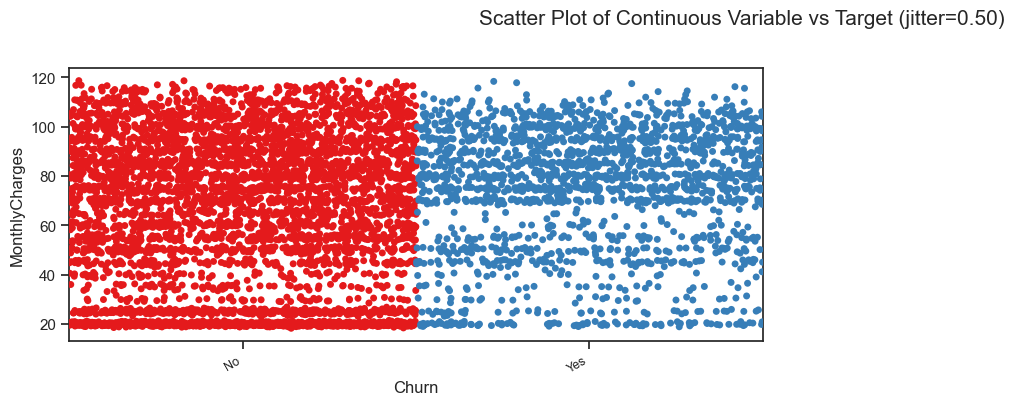

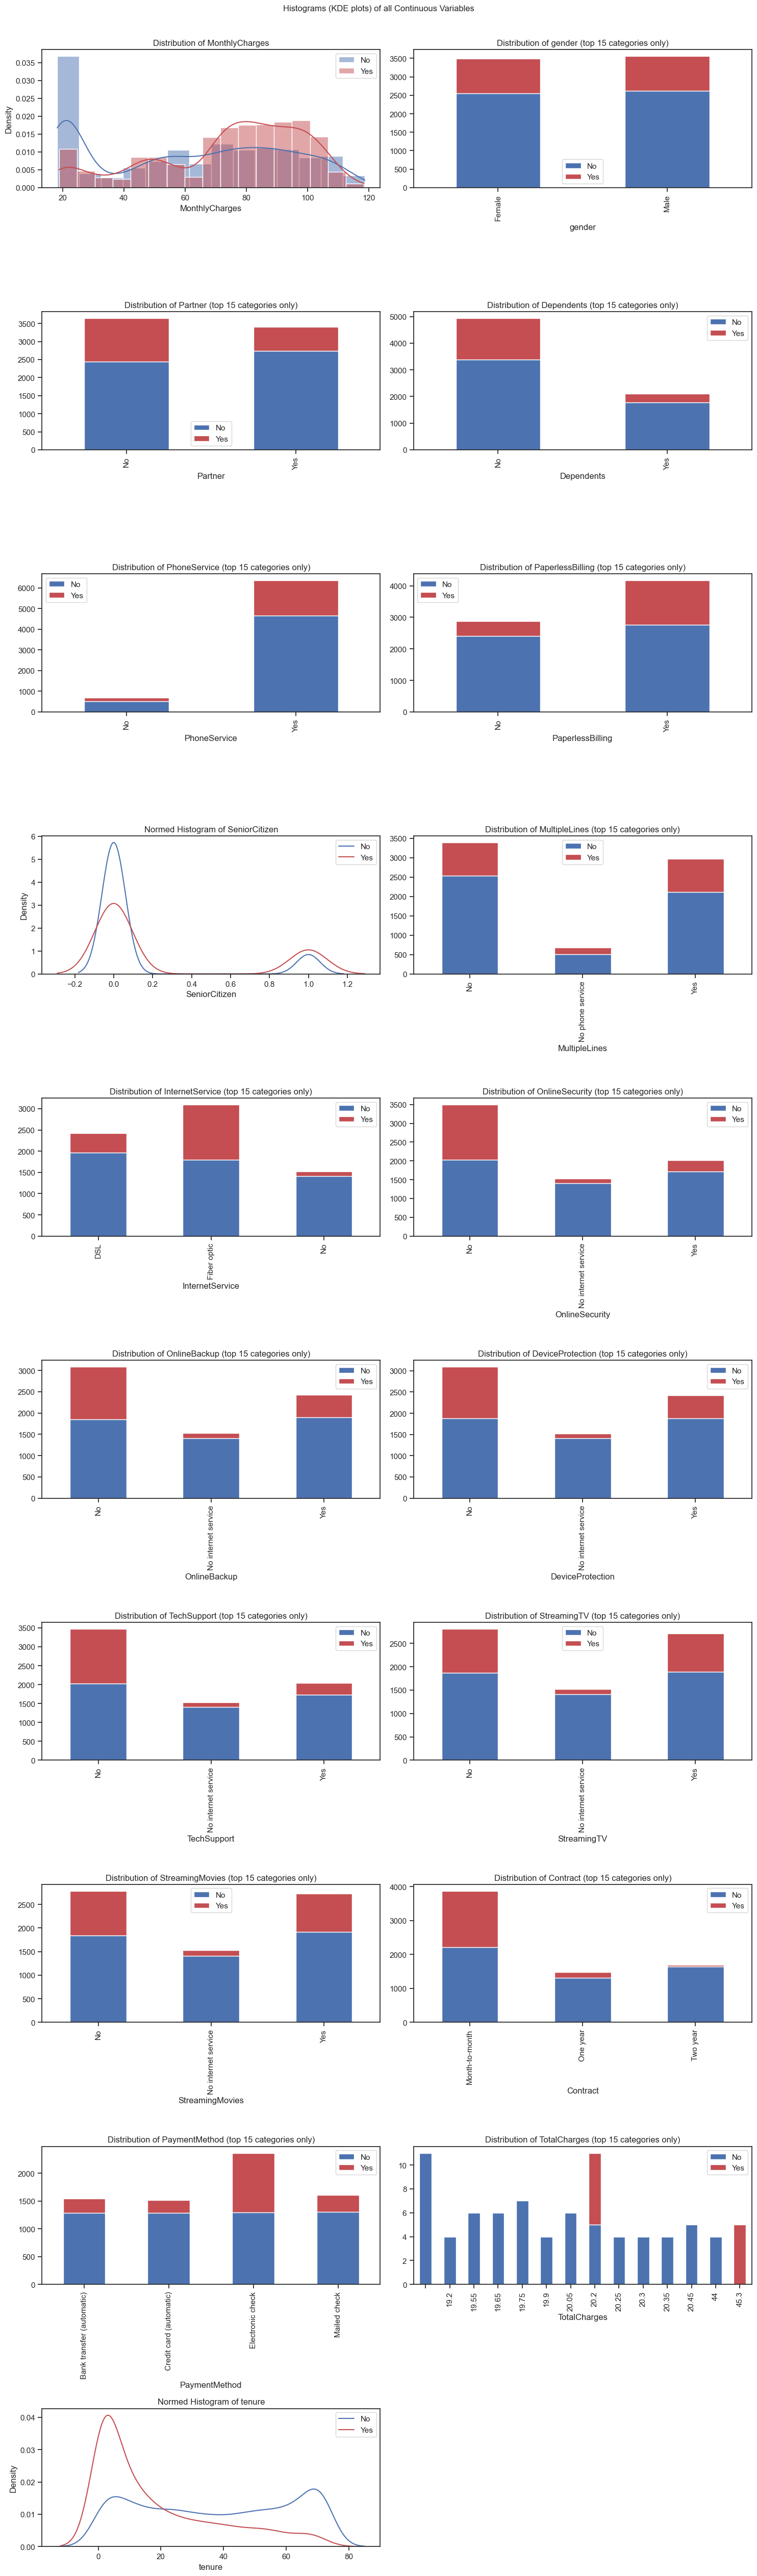

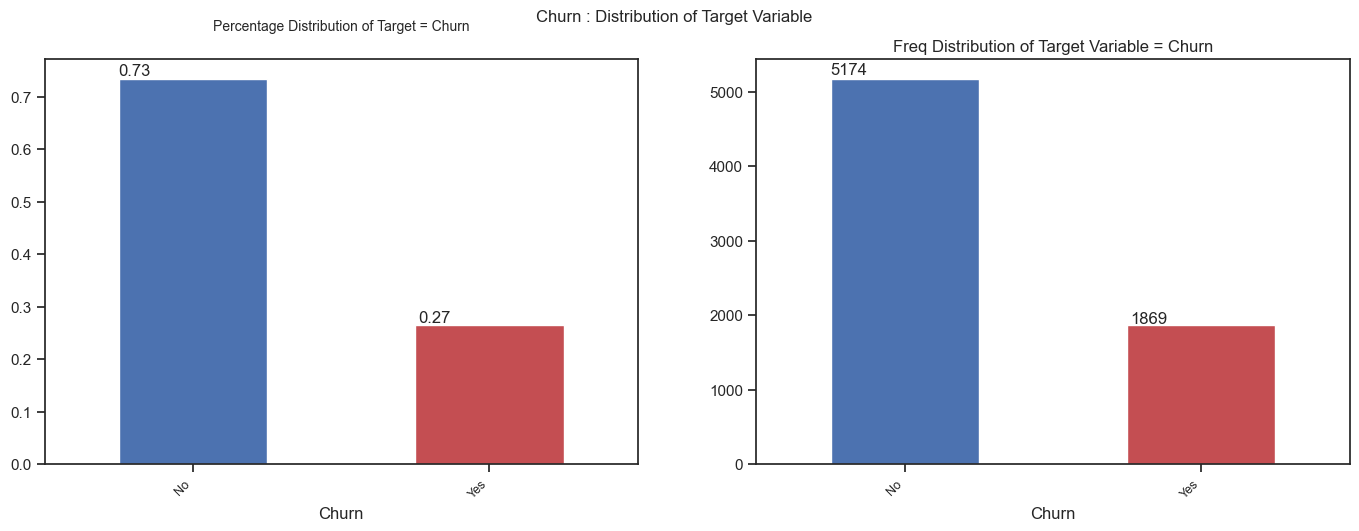

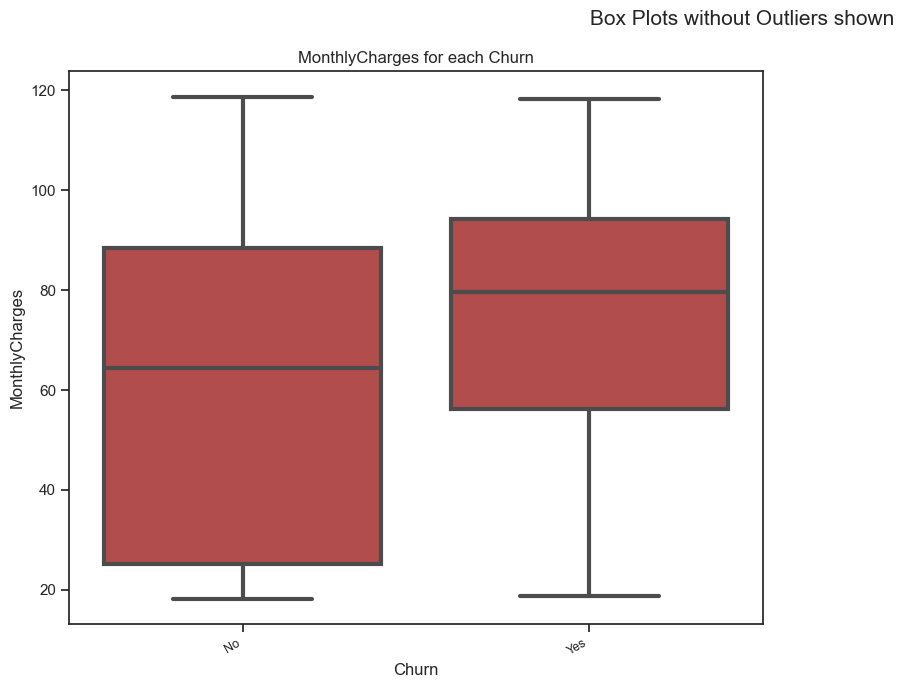

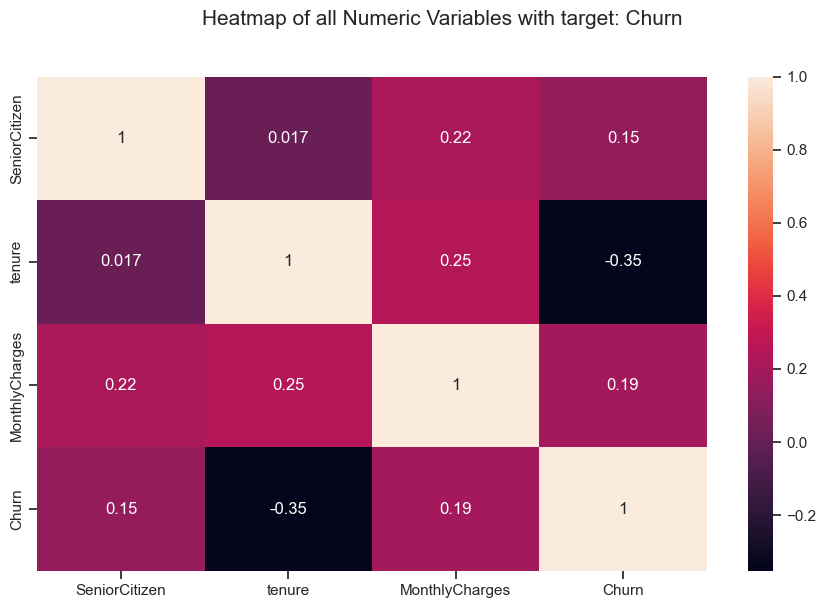

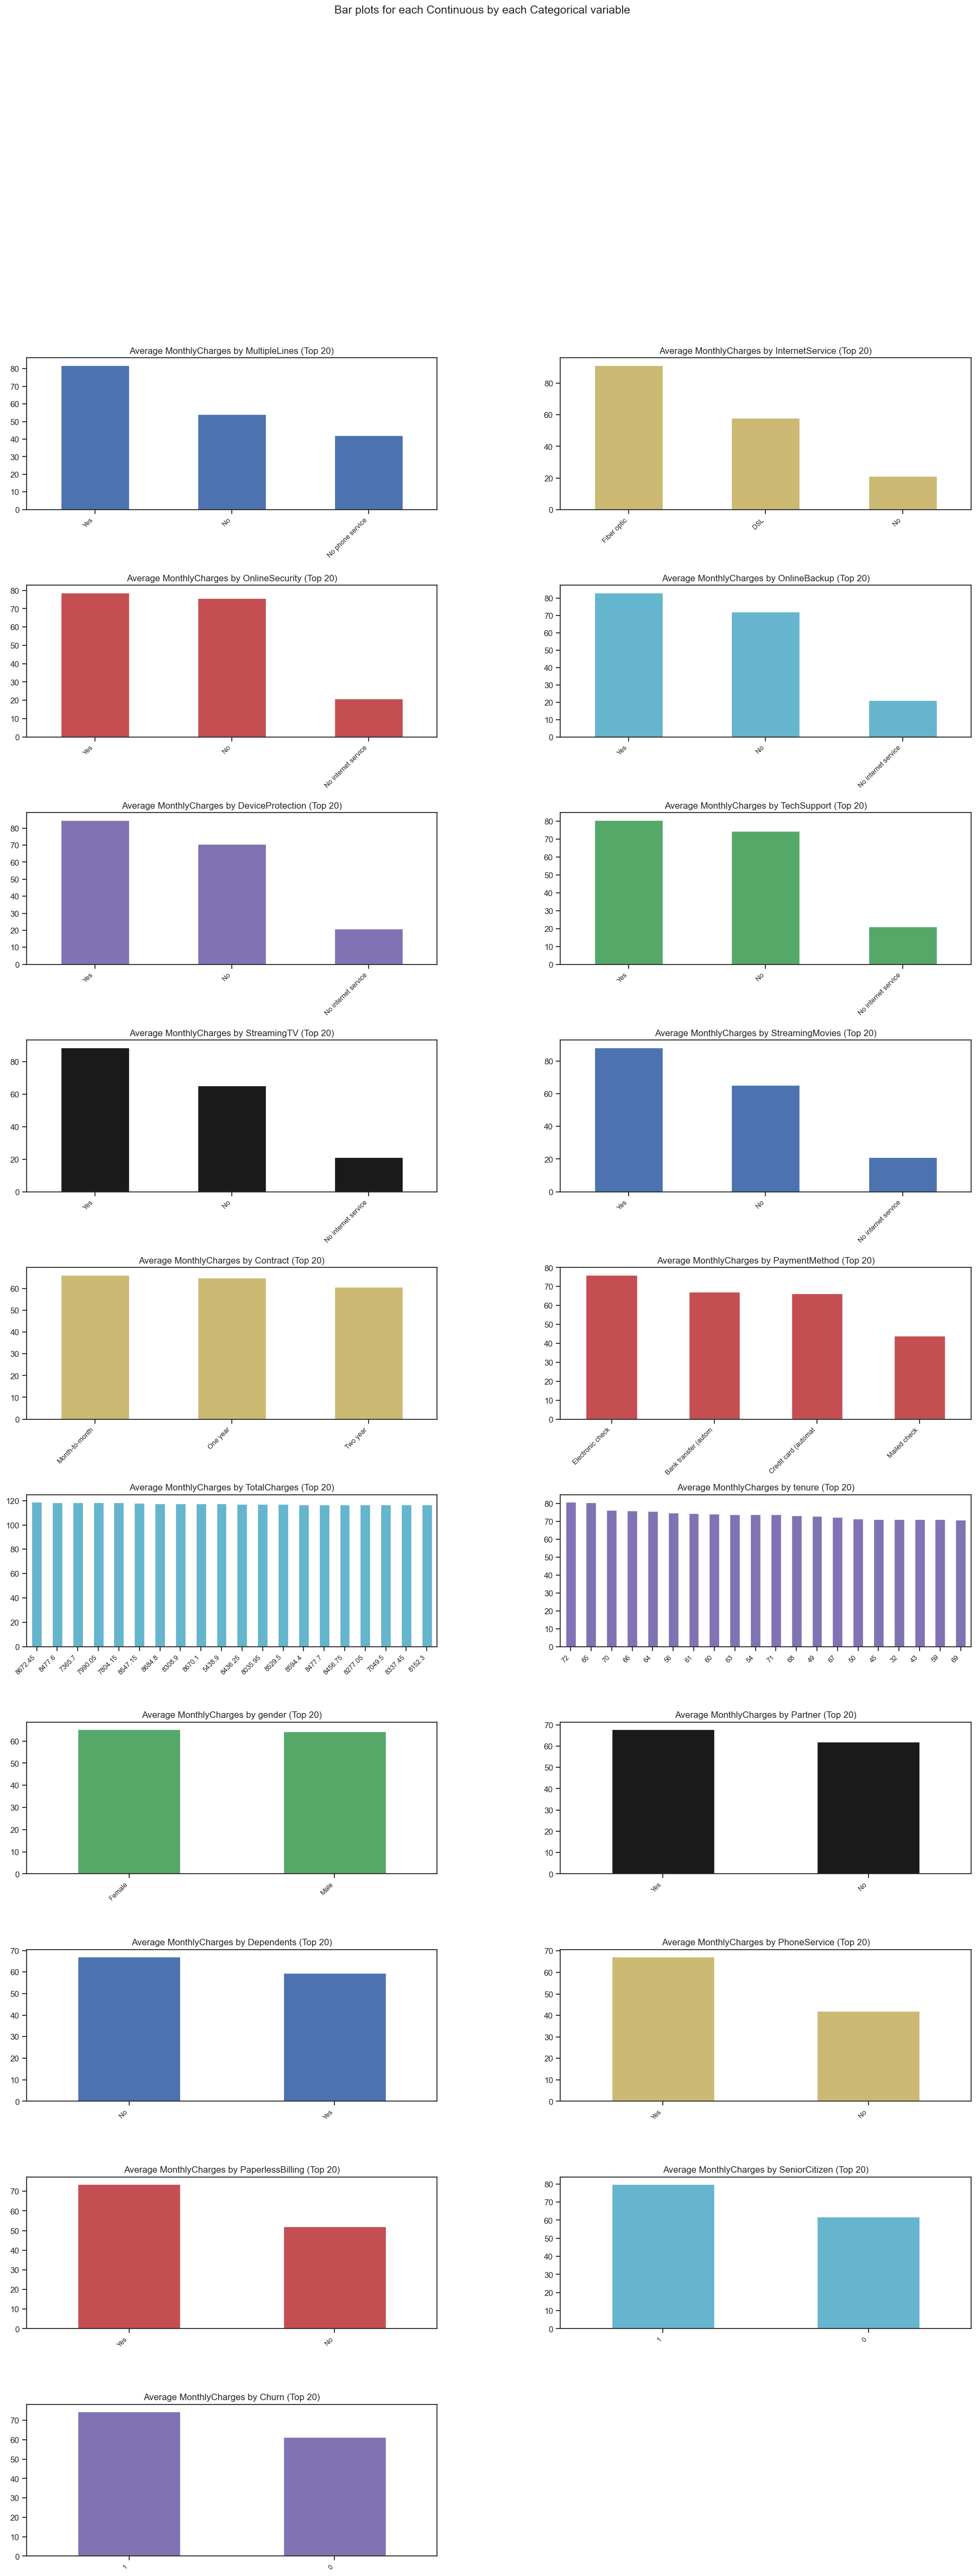

In [7]:
# Autoviz display
%matplotlib inline
AV = AutoViz_Class()
dfte = AV.AutoViz(filename="", sep=',', depVar='Churn', dfte=df, header=0, verbose=2, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir="reports_html")

In [8]:
#autoviz report to html
importlib.reload(dpf)
dpf.generate_autoviz_html_report(folder_name="reports_html/Churn", output_filename="telcos_churn_eda_report.html")

✅ AutoViz HTML report saved to: D:\portfolio\my_projects\DataAnalysis\notebooks\reports_html\Churn\telcos_churn_eda_report.html


'D:\\portfolio\\my_projects\\DataAnalysis\\notebooks\\reports_html\\Churn\\telcos_churn_eda_report.html'

- **Class imbalance** was observed in the target variable (`Churn`), with around 26.5% of customers labeled as churners.
- **Tenure and MonthlyCharges** remained important features, with churners generally having shorter tenure and higher monthly charges.
- Visualizations from the HTML EDA report revealed:
  - Customers with **month-to-month contracts**, **paperless billing**, and **electronic checks** have higher churn rates.
  - **Senior citizens** and customers **without a partner or dependents** show increased likelihood of churning.
  - Churn is higher among customers **with fiber optic internet** and those **lacking services** like online backup, tech support, and streaming TV.
  - **Long-term contract types (one or two years)** are associated with significantly lower churn.
- **Correlation analysis** showed:
  - A **negative correlation between tenure and churn**, indicating long-tenured customers are more loyal.
  - A **positive correlation between monthly charges and churn**, suggesting higher-cost plans may lead to dissatisfaction if not matched by perceived value.

### Data Quality Issues and Fixes

| **Issue**                  | **Fix**                                                                 |
|----------------------------|-------------------------------------------------------------------------|
| 🟡 Missing `TotalCharges`  | Convert to `NaN` → drop or impute (often tied to `tenure = 0`)          |
| 🟡 Wrong Data Type         | Convert `TotalCharges` to float using `pd.to_numeric(errors='coerce')` |
| 🟡 Duplicates              | Check with `df.duplicated().sum()` and drop if any                     |
| 🔴 Imbalanced Target (`Churn`) | Use **SMOTE**                            |
| 🟡 Categorical Noise/ Typos      | Clean with `.str.strip()`, simplify long labels (e.g., remove "(automatic)") |
| 🟡 Outliers in Charges     | Detect via boxplots; cap if needed                           |


#### Data Preprocessing

In [9]:
df_telco = df.copy()

# Convert column names to lowerca
df_telco.columns = df_telco.columns.str.lower()
df_telco.shape

(7043, 20)

In [10]:
# Handle Missing Values in totalcharges
# Convert empty strings to NaN 
df_telco['totalcharges'] = pd.to_numeric(df_telco['totalcharges'], errors='coerce')

# Check how many are missing
missing_totalcharges = df_telco['totalcharges'].isna().sum()
print(f"Missing TotalCharges: {missing_totalcharges}")

# fill missing values with 0 or mean
df_telco['totalcharges'].fillna(0, inplace=True)
df_telco['totalcharges'].fillna(df_telco['totalcharges'].mean(), inplace=True)

missing_totalcharges_after = df_telco['totalcharges'].isna().sum()
print(f"Missing TotalCharges: {missing_totalcharges_after}")
print(df_telco['totalcharges'].dtypes)  # Should now be float64


Missing TotalCharges: 11
Missing TotalCharges: 0
float64


In [11]:
# Check for full-row duplicates 
duplicates = df_telco.duplicated().sum()
print(f" Duplicate rows : {duplicates}")

 Duplicate rows : 22


In [12]:
# Remove exact duplicate rows 
df_telco = df_telco.drop_duplicates()

# Confirm removal
print(" Duplicate rows removed.")
print(" New shape:", df_telco.shape)
print("Remaining full-row duplicates:", df_telco.duplicated().sum())

 Duplicate rows removed.
 New shape: (7021, 20)
Remaining full-row duplicates: 0


#### Clean Categorical Values (remove whitespaces, standardize): Remove Irrelevant or Unique Columns

In [13]:
# Drop unique ID column if exists
if 'customerid' in df.columns:
    df_telco.drop('customerid', axis=1, inplace=True)

In [14]:
# Strip whitespace from all object columns
for col in df_telco.select_dtypes(include='object').columns:
    df_telco[col] = df_telco[col].str.strip().str.lower()  # convert to lowercase for consistency

In [15]:
# Check unique values
for col in df_telco.select_dtypes(include='object').columns:
    print(f"{col}: {df_telco[col].unique()}")


gender: ['female' 'male']
partner: ['yes' 'no']
dependents: ['no' 'yes']
phoneservice: ['no' 'yes']
multiplelines: ['no phone service' 'no' 'yes']
internetservice: ['dsl' 'fiber optic' 'no']
onlinesecurity: ['no' 'yes' 'no internet service']
onlinebackup: ['yes' 'no' 'no internet service']
deviceprotection: ['no' 'yes' 'no internet service']
techsupport: ['no' 'yes' 'no internet service']
streamingtv: ['no' 'yes' 'no internet service']
streamingmovies: ['no' 'yes' 'no internet service']
contract: ['month-to-month' 'one year' 'two year']
paperlessbilling: ['yes' 'no']
paymentmethod: ['electronic check' 'mailed check' 'bank transfer (automatic)'
 'credit card (automatic)']
churn: ['no' 'yes']


In [16]:
# remove (automatic) from payment method names
df_telco['paymentmethod'] = df_telco['paymentmethod'].str.replace(' (automatic)', '', regex=False)
print(df_telco.paymentmethod.unique())

['electronic check' 'mailed check' 'bank transfer' 'credit card']


#### Outlier Detection & Treatment

In [17]:
# Check for outliers across all numeric columns using IQR
importlib.reload(dpf)
outlier_counts = dpf.detect_outliers_all(df_telco)
print(outlier_counts)

                outlier_count
tenure                0      
monthlycharges        0      
totalcharges          0      


## Correlations & Hypothesis Testing (CHI-SQUARE & ANOVA)

This section uses Chi-Square Test to test if a categorical column has a relation with churn label while also presenting visualizations to explore how each feature is distributed across churned and non-churned customers.

### hypothesis testing

In [18]:
# Step 1: Run batch chi-square test
importlib.reload(dpf)
cat_cols = df_telco.select_dtypes(include='object').columns.tolist()
chi_summary = dpf.chi_square_test_batch(df_telco, cat_cols, target_column='churn', plot=False)
chi_summary.sort_values('p_value')


,feature,p_value,significant
1,partner,0.0000,True
2,dependents,0.0000,True
6,onlinesecurity,0.0000,True
5,internetservice,0.0000,True
7,onlinebackup,0.0000,True
10,streamingtv,0.0000,True
9,techsupport,0.0000,True
8,deviceprotection,0.0000,True
12,contract,0.0000,True
13,paperlessbilling,0.0000,True


These results suggest that service usage patterns and billing methods are more predictive of churn than basic demographics.

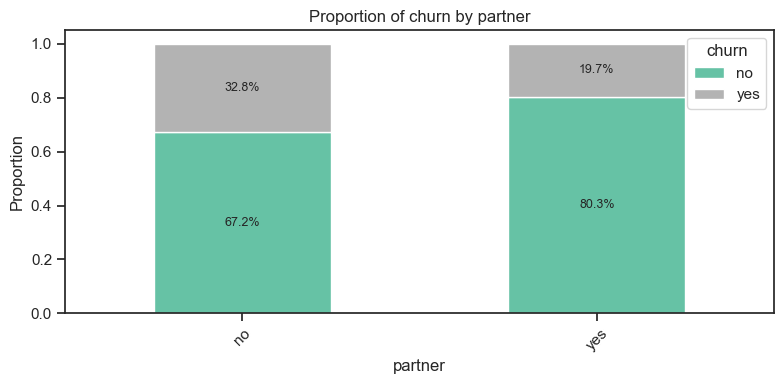

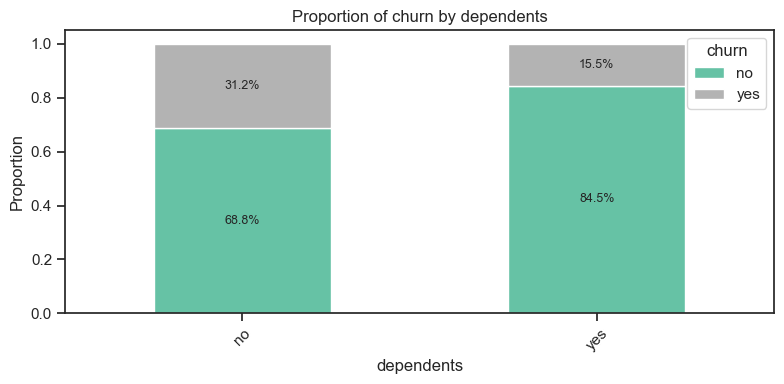

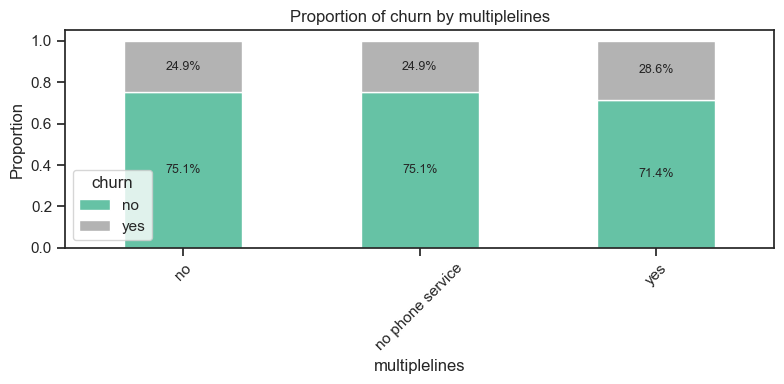

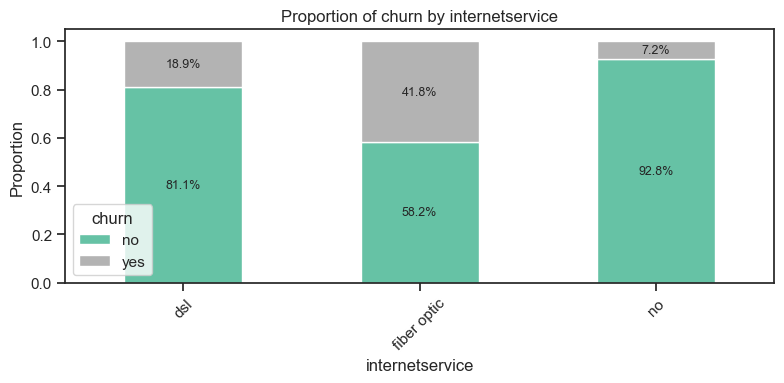

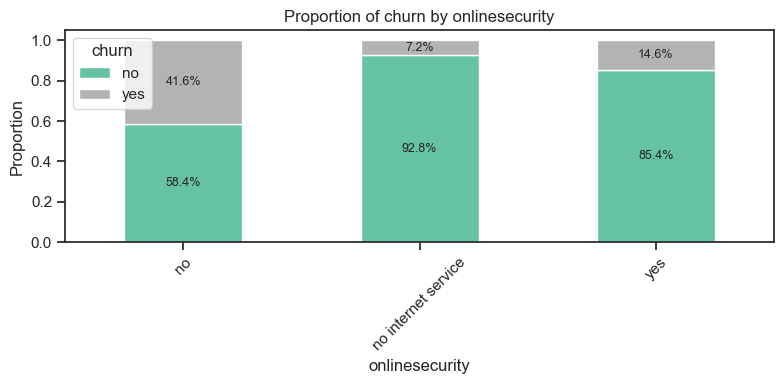

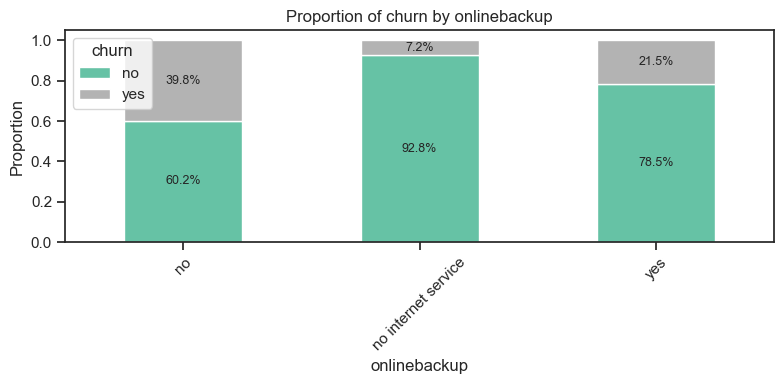

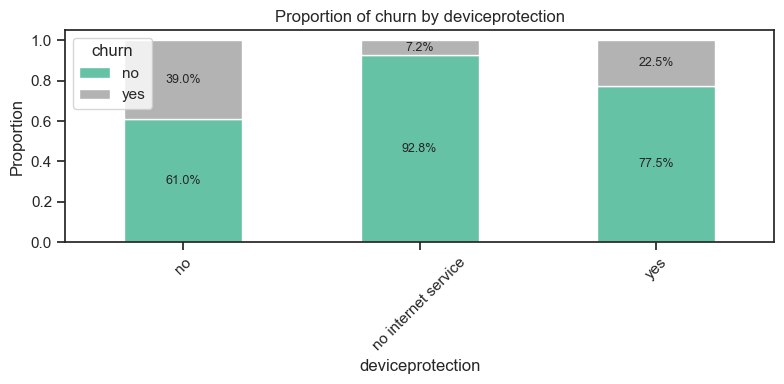

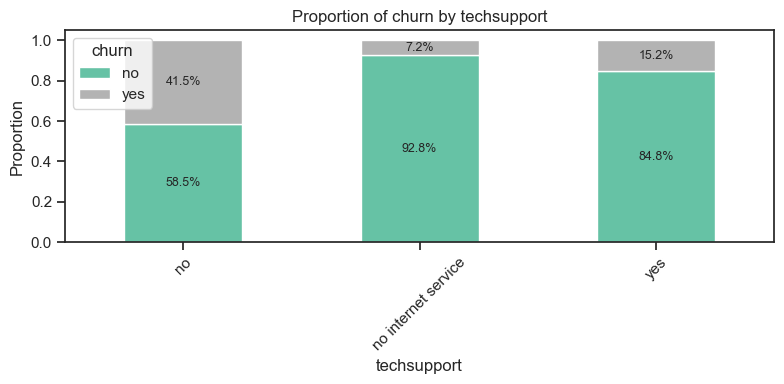

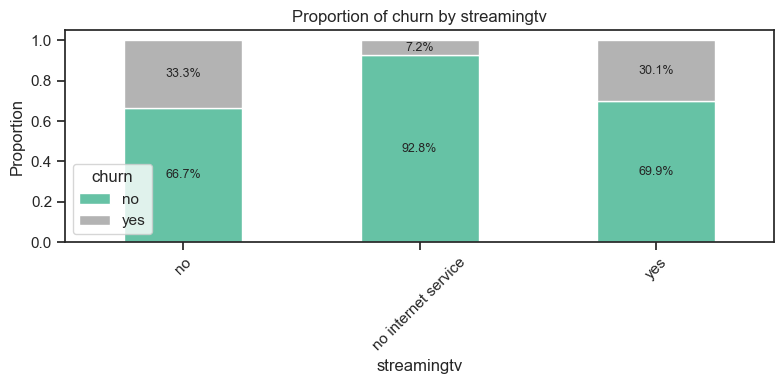

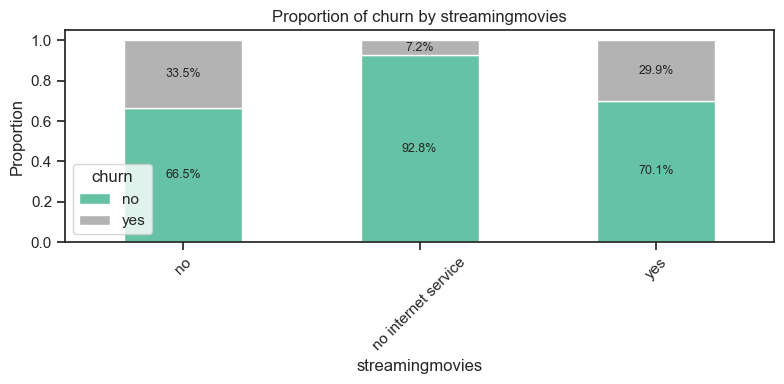

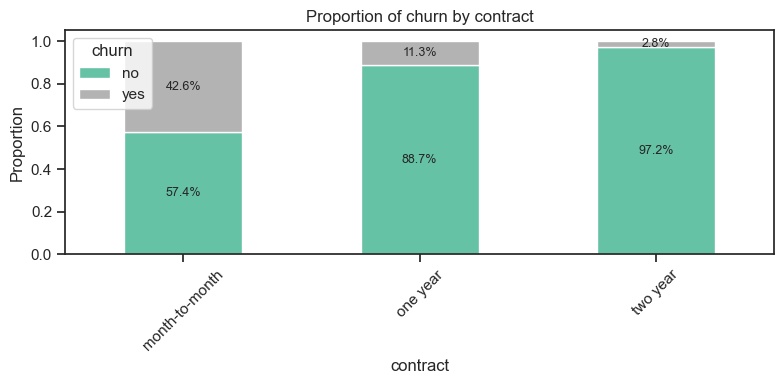

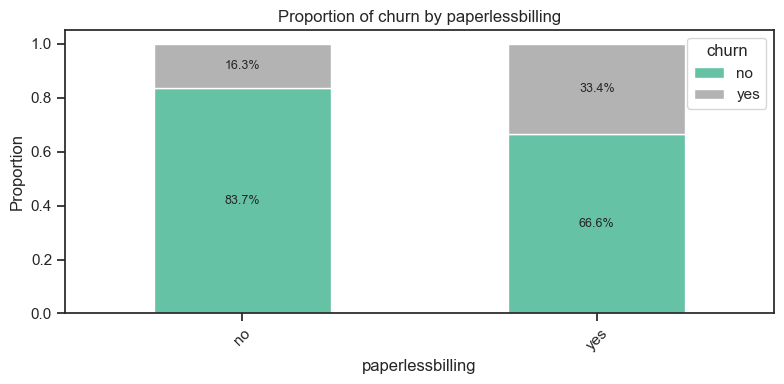

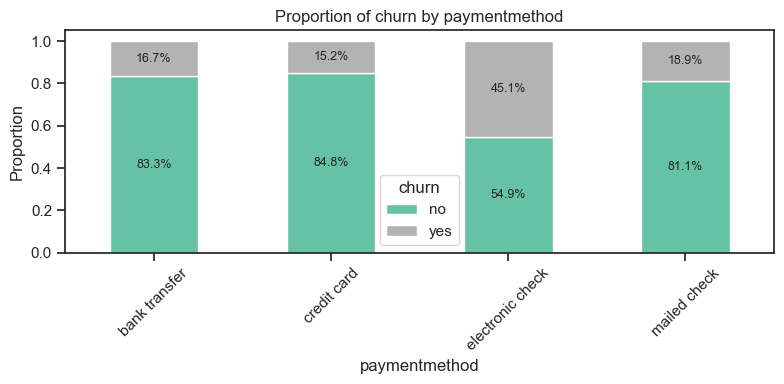

In [19]:
# Step 2: Dynamically select significant features (excluding churn itself)
significant_features = chi_summary[
    (chi_summary['significant'] == True) &
    (chi_summary['feature'] != 'churn')
]['feature'].tolist()

# Step 3: Plot proportions
dpf.plot_significant_categorical_proportions(df_telco, significant_features, target_column='churn')


Chi-Square Test Insights (Categorical Variables)

- Churn is significantly associated with nearly all service and customer attributes (p-value < 0.05).
- Customers without partners or dependents are more likely to churn.
- 0Churn is higher among customers without online security, backup, tech support, or device protection.
- Fiber optic internet users and those on month-to-month contracts show the highest churn.
- Electronic check payment method and paperless billing are also strongly linked to churn.
- Streaming services (TV & movies) show some influence, but not as strongly as core services or contracts.
- **Gender and phoneservice show no significant relationship with churn.**

***These findings highlight that contract type, service engagement, and billing behavior are key churn predictors.***

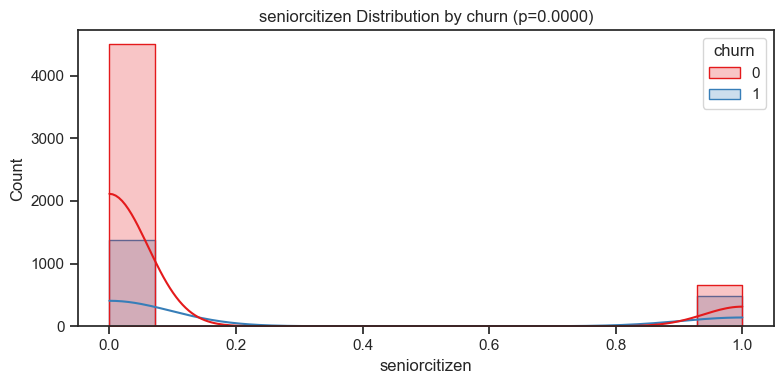

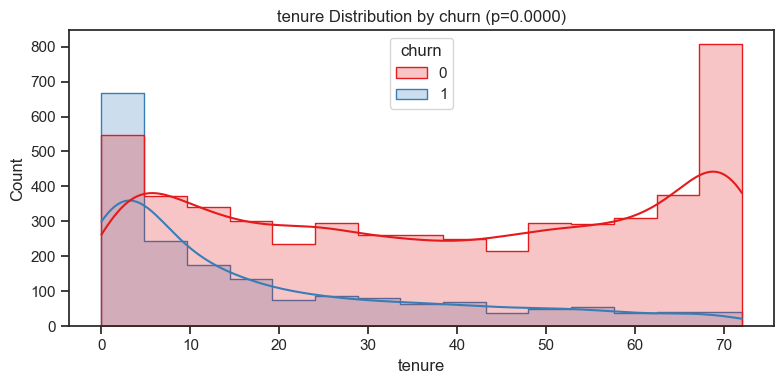

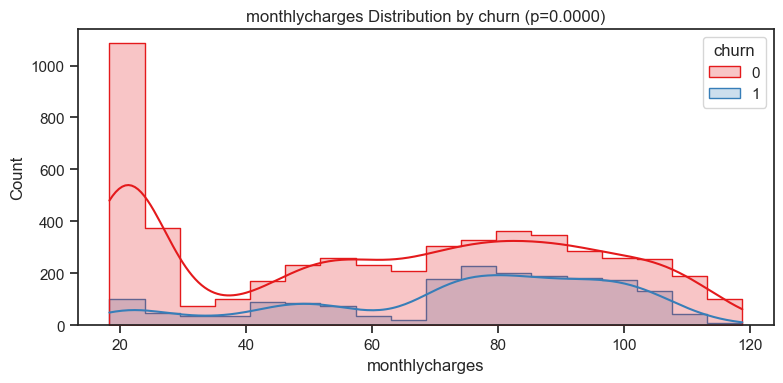

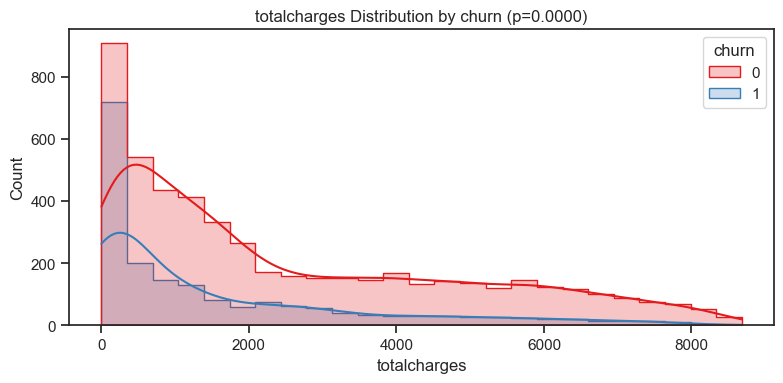

      feature      p_value  significant
0   seniorcitizen    0.0       True    
1          tenure    0.0       True    
2  monthlycharges    0.0       True    
3    totalcharges    0.0       True    


In [20]:
#Step 2: ANOVA test with histogram plotting 
numeric_cols = df_telco.select_dtypes(include='number').drop(columns=['churn'], errors='ignore').columns.tolist()

anova_results = dpf.anova_test_numerical_features(df_telco, numeric_cols, target_column='churn', plot=True)
print(anova_results)

ANOVA Test Insights (Numeric Variables)
- All numeric features (seniorcitizen, tenure, monthlycharges, totalcharges) show statistically significant differences across churn groups (p-value = 0.0000).
- Churners tend to have:
    - Lower tenure (mostly new customers)
    - Higher monthly charges
    - Lower total charges, suggesting shorter customer lifespan
    - Senior citizens churn at higher rates compared to non-seniors.
  
***These features are highly informative and should be prioritized in churn prediction models.***

## Feature Relevance Analysis & Feature Engineering

- **Mutual information — analysis of linear and nonlinear relationships** is a measure of the dependency between two variables in machine learning, indicating the usefulness of the independent variable in predicting the target. It is implemented in the Scikit-Learn library's metrics package, allowing for the identification of predictor variables that are independent of the target (churn).
- feature importance analysis uses a RandomForestClassifier to:
  - Encode categorical variables
  - Compute feature importances
  - Plot the top N most important features
Together, these methods offer both statistical and model-based insights for robust feature selection.

### Feature Relevance

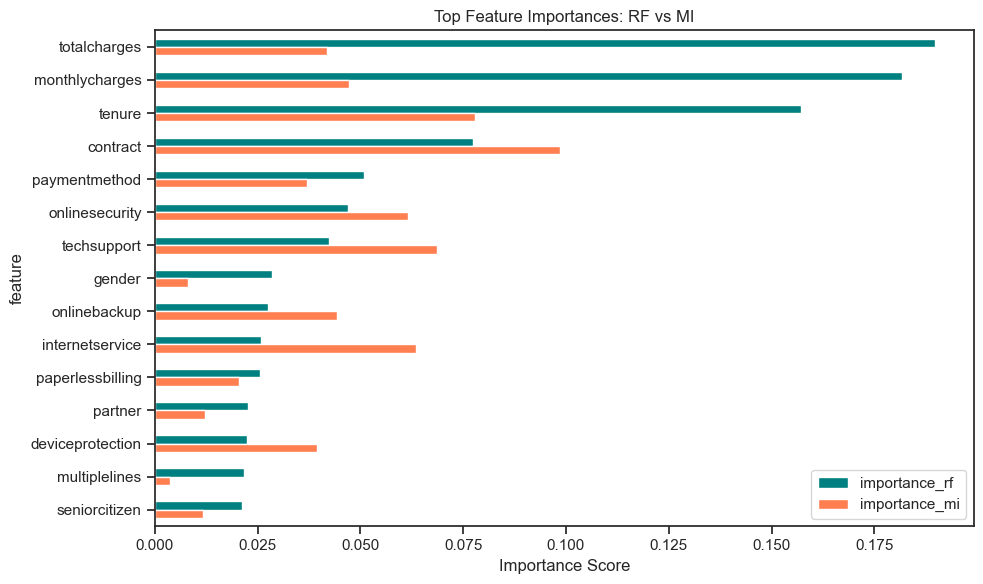

In [23]:
# feature importance
importlib.reload(mlpu)
importance_df = mlpu.compute_combined_feature_importance(df_telco, target_column='churn', top_n=15, plot=True)
#print(importance_df)

#### Top Predictive Features (High Importance and Statistical Significance)
The following features consistently show high predictive power across Random Forest importance, Mutual Information scores, and hypothesis testing:

- `tenure`: Longer tenure is strongly associated with lower churn.
- `monthlycharges`: Higher charges are linked to higher churn.
- `totalcharges`: Lower total charges (often new customers) are associated with higher churn.
- `contract`: Long-term contracts (1–2 years) significantly reduce churn.
- `techsupport`, `onlinesecurity`, `onlinebackup`: Lack of support services correlates with higher churn.
- `internetservice`: Fiber optic users churn more than DSL or non-users.
- `paymentmethod`: Electronic check users have higher churn.
- `paperlessbilling`: Paperless billing customers are more likely to churn.

These features would be prioritized in the churn prediction model.

####  Features to Drop or Deprioritize
These features consistently show low predictive power and weak/no statistical association with churn:

- `phoneservice`  `gender` `dependents` `multiplelines` `streamingtv` `streamingmovies`

These would be excluded from the model or given lower priority during feature selection.

### Feature Engineering

In [24]:
#Encoding categorical variables (label encoding and one-hot encoding).
X, y = mlpu.prepare_features(
    df_telco,
    target_column='churn',
    drop_columns=[
        'phoneservice', 'gender', 'dependents',
        'multiplelines', 'streamingtv', 'streamingmovies'
    ]
)
#X: cleaned and encoded features
#y: binary target variable

In [25]:
# scale for numerical attributes and split df for modelling
X_train, X_test, y_train, y_test, pipeline = mlpu.scale_and_split(
    df_telco,
    target_column='churn'
)

In [26]:
y_train.value_counts()

churn
0    4131
1    1485
Name: count, dtype: int64

The class distribution is approximately 74% to 26%, indicating a significant imbalance that may lead to model bias toward the majority class. To address this, SMOTE (Synthetic Minority Over-sampling Technique) will be applied to generate synthetic examples of the minority class and ensure a more balanced dataset for training.

### Handling Class Imbalance (SMOTE)

In [27]:
# Balance the training set

X_train_resampled, y_train_resampled = mlpu.balance_classes_smote(X_train, y_train)
print(y_train_resampled.value_counts())

churn
1    4131
0    4131
Name: count, dtype: int64


## Modeling Approach

**Post-SMOTE Modeling and Evaluation Plan**

| **Step**                       | **Description**                                                                 |
|-------------------------------|----------------------------------------------------------------------------------|
| **1. Establish a Baseline**   | Use a `DummyClassifier` to predict the most frequent class as a reference point.|
| **2. Train Models**           | Evaluate: Logistic Regression, Random Forest, SVM, KNN, Dummy                   |
| **3. Evaluate Models**        | Use metrics: Accuracy, Precision, Recall, F1-score, ROC-AUC                     |
| **4. Compare & Visualize**    | Plot Confusion Matrix, ROC Curve, Cross-validation scores                       |
| **5. Model Selection**        | Use `GridSearchCV` to tune hyperparameters and select best performer            |
| **6. Optional Enhancements**  | Save model with `joblib`, add SHAP for explainability       |

**Model Candidates**

| **Algorithm**          | **Purpose**                                                              |
|------------------------|---------------------------------------------------------------------------|
| Dummy Classifier       | Sets the baseline using majority class                                   |
| Logistic Regression    | Simple, interpretable model for binary classification                    |
| Random Forest          | Robust ensemble model with feature importance                            |
| K-Nearest Neighbors    | Distance-based, useful for quick benchmarking                            |
| Support Vector Machine | Good for high-dimensional, non-linear boundaries                         |

### Train baseline and other models using cross validation ==5

In [28]:
# Train and evaluate models
results, trained_models = mlpu.train_and_evaluate_models(X_train_resampled, y_train_resampled)

Evaluating: Dummy
Evaluating: Logistic Regression
Evaluating: Random Forest
Evaluating: KNN
Evaluating: SVM


In [29]:
# Observe Metrics
summary_df = mlpu.results_to_dataframe(results)
summary_df

,Model,ROC AUC,Accuracy,Precision (1),Recall (1),F1-score (1)
0,Dummy,0.499879,0.499879,0.499698,0.199952,0.285615
1,Logistic Regression,0.859535,0.782256,0.758766,0.827645,0.791710
2,Random Forest,0.926494,0.855846,0.848837,0.865892,0.857280
3,KNN,0.864863,0.788066,0.733150,0.905834,0.810395
4,SVM,0.888300,0.809247,0.791867,0.839022,0.814763


To support the project goal of minimizing churn, model selection must prioritize metrics that align with **identifying at-risk customers**, even if it means tolerating some false positives.

**Key Evaluation Metrics and Why They Matter**

| **Metric**    | **Why it Matters**                                                                 |
|---------------|-------------------------------------------------------------------------------------|
| **Recall (1)**     | Maximize the correct identification of churners — so no at-risk customer is missed |
| **F1-score (1)**   | Balance between recall and precision to avoid over-alerting on false positives     |
| **Precision (1)**  | Important if interventions are costly (e.g., discounts or calls to retain customers) |

Based on the results and the churn minimization objective (high recall), the following models are most aligned and recommended for tuning:
- K-Nearest Neighbors (KNN) — highest recall (0.906), strong F1
- Random Forest — best overall balance, high precision, recall, and F1
- SVM — excellent recall (0.839) with strong overall metrics
- Logistic Regression — reliable and interpretable with solid recall

I'll prioritize models with high recall, but also consider F1-score to ensure the predictions are not overly noisy or expensive.

### Compare and Visualize

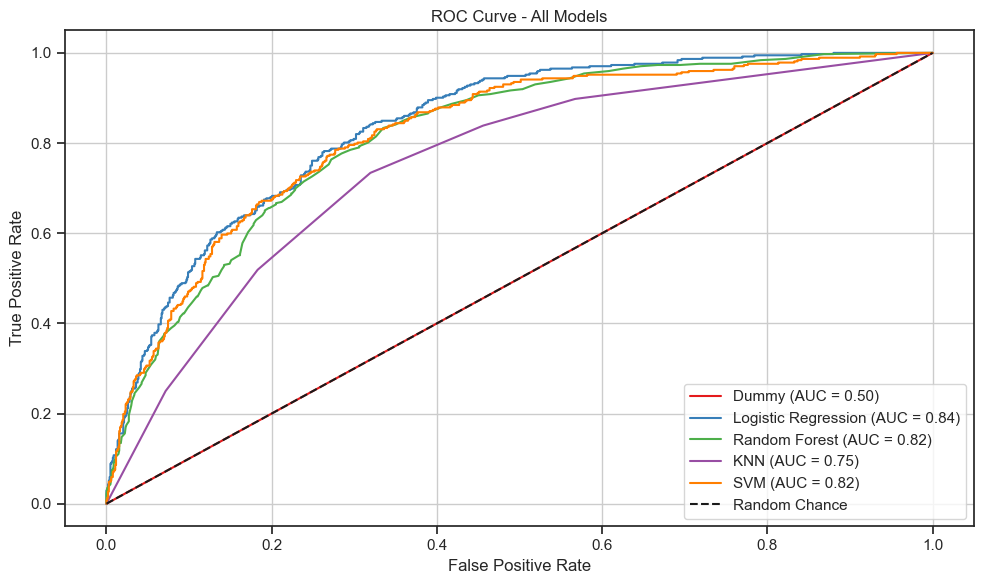

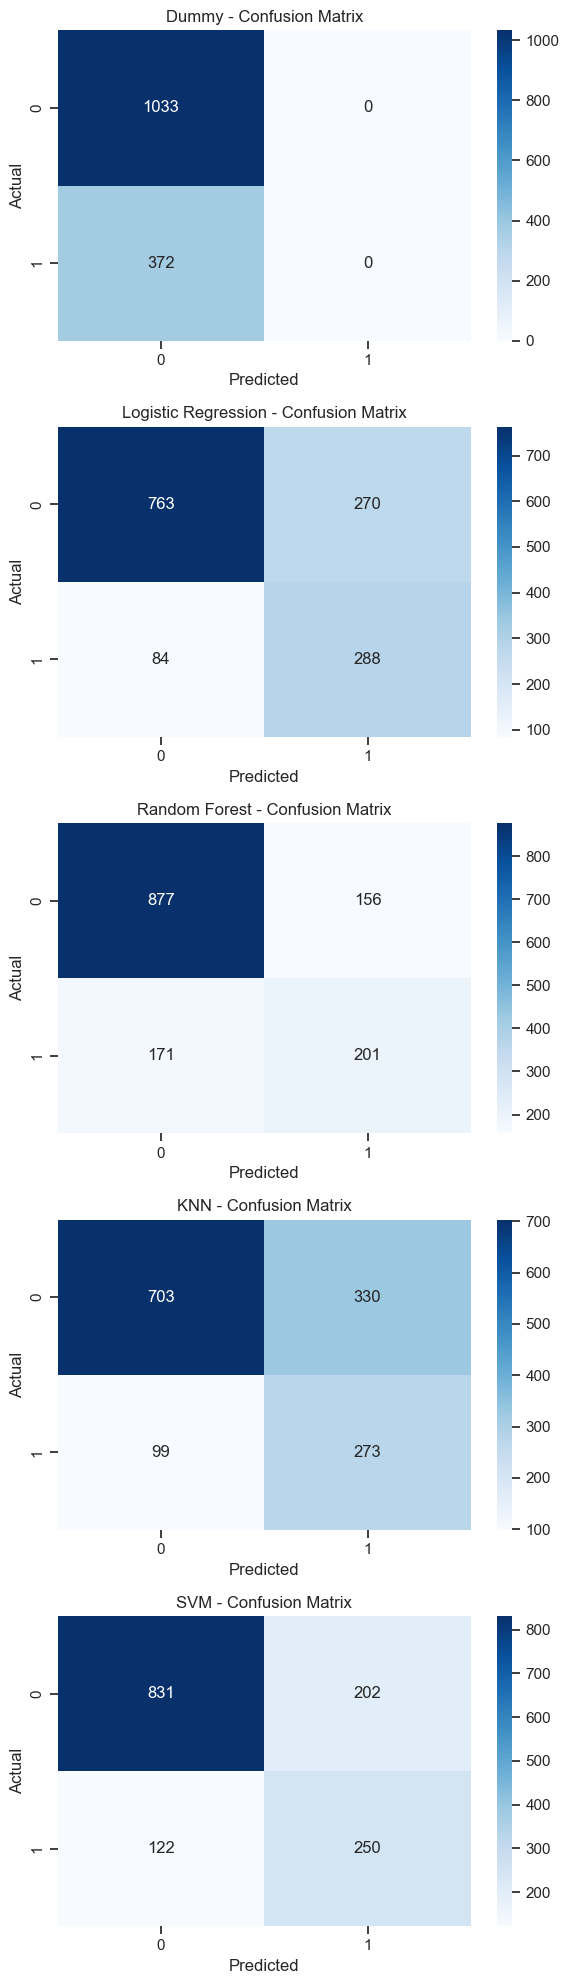

In [30]:
# plt model metric
mlpu.plot_model_evaluations(trained_models, X_test, y_test)

### Model Selection and Tuning using  GridSearchCV with scoring='recall'

In [ ]:
#Tune selected models
models_to_tune = {
    "Logistic Regression": (LogisticRegression(max_iter=1000),{"C": [0.01, 0.1, 1, 10]}),
    "Random Forest": (RandomForestClassifier(),{"n_estimators": [100, 200], "max_depth": [4, 6, None]}),
    "SVM": (SVC(probability=True), {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]} ),
    "KNN": (KNeighborsClassifier(), {"n_neighbors": [3, 5, 7]} )
}
best_model, best_name, best_score = mlpu.tune_and_select_best_model(X_train_resampled, y_train_resampled, models_to_tune)

🔍 Tuning Logistic Regression...
 Logistic Regression Best Recall: 0.8269 | F1: 0.7911 | Params: {'C': 0.1}
🔍 Tuning Random Forest...
 Random Forest Best Recall: 0.8640 | F1: 0.8492 | Params: {'max_depth': None, 'n_estimators': 200}
🔍 Tuning SVM...


**Model Tuning Summary (Final Selection)**

| **Model**            | **Recall** | **F1-score** | **Remarks**                                      |
|----------------------|------------|--------------|--------------------------------------------------|
| Logistic Regression  | 0.827      | 0.791        | Interpretable, reliable, but lower recall        |
| Random Forest        | 0.865      | 0.848        | Strong all-rounder with high F1                  |
| SVM                  | 0.875      | 0.831        | High recall, slightly less balanced              |
| **KNN (Selected)**   | **0.911**  | 0.818        |  **Top recall** — best for identifying churners |

**Why KNN?**  
KNN achieved the **highest recall**, aligning best with the project’s goal to **minimize churn** by capturing the most at-risk customers, even at the cost of some precision.

*Additionally, consider the business context and the costs associated with false positives and false negatives to make a well-informed decision.*

# Business Summary & Recommendations: Churn Prediction Project

## Summary

Re-visiting the project's objective to minimise customer churn by identifying at-risk customers using predictive modeling, key Findings include:
- **Class imbalance** was addressed using SMOTE to avoid model bias toward non-churners.
- **Exploratory Data Analysis (EDA)** revealed:
  - Customers with **short tenure**, **month-to-month contracts**, and **high monthly charges** are more likely to churn.
  - Lack of add-on services (like online security or tech support) correlates with higher churn.
- **Chi-Square and ANOVA** confirmed strong associations between churn and features like:
  - `Contract`, `InternetService`, `TechSupport`, `MonthlyCharges`, and `Tenure`.

Modeling Insights:
**KNN** was selected for deployment due to its **high recall**, critical for minimizing missed churners.

| Model                | Recall (1) | F1-score | Notes                             |
|---------------------|------------|----------|-----------------------------------|
| Logistic Regression | 0.827      | 0.791    | Interpretable baseline            |
| Random Forest       | 0.865      | 0.848    | Best balanced performer           |
| SVM                 | 0.875      | 0.831    | Strong, but less interpretable    |
| **KNN (Selected)**  | **0.911**  | 0.818    | 🔥 Highest recall — best at catching churners |

With a recall of **91%**, the model can proactively identify and help retain most churn-risk customers, empowering data-driven customer success strategies.

## Recommendations

1. **Target At-Risk Customers**  : Focus retention efforts on customers:
    - With **month-to-month contracts**
    - Who lack **tech support or online security**
    - Paying **higher monthly charges** or with **short tenure**

2. **Offer Loyalty Incentives**  
   Promote longer-term contracts and bundles (e.g., security + support) to boost retention.

3. **Monitor Churn Drivers**  
   Integrate model explanations (e.g., SHAP or feature importance) into dashboards for ops teams.

4. **Deploy & Monitor Model**  
   Use the saved `best_model.pkl` to score live data, with regular retraining based on churn trends.

5. **Build Feedback Loop**  
   Capture customer response to interventions and feed results into model retraining cycles.

# Conclusion

The churn prediction project identified key drivers of customer attrition and delivered a highly accurate model (91% recall) to support proactive retention. These insights enable strategic interventions in a highly competitive telecom market.

By targeting at-risk customers with tailored offers and service improvements, the business can increase customer lifetime value, reduce acquisition costs, and strengthen brand loyalty. **Retention is not just operational — it’s a growth strategy.**